<a href="https://colab.research.google.com/github/3B032070/2025_ML_hws/blob/main/hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 資料預處理

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


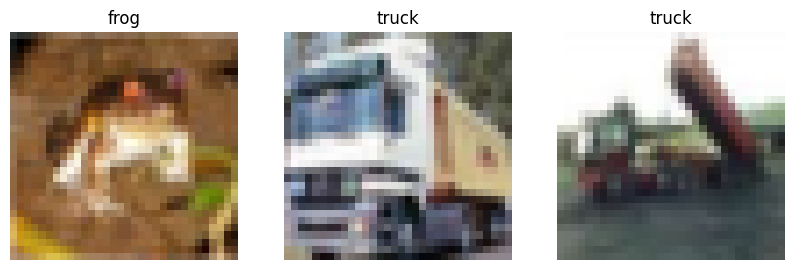

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# 載入資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 顯示形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 將 label 轉成 one-hot
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# 標籤名稱
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 顯示圖片
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0


# 2. 建立 CNN 模型

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Layer 1: Conv2D (32 filters, 5x5)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
# Params: (5*5*3 + 1)*32 = 2432

# Layer 2: Dropout
model.add(Dropout(0.25))

# Layer 3: Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Conv2D (64 filters, 3x3)
model.add(Conv2D(64, (3, 3), activation='relu'))
# Params: (3*3*32 + 1)*64 = 18496

# Layer 5: Dropout
model.add(Dropout(0.25))

# Layer 6: Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Flatten
model.add(Flatten())

# Layer 8: Dropout
model.add(Dropout(0.25))

# Layer 9: Dense (1024)
model.add(Dense(1024, activation='relu'))
# Params 需視輸入單位計算

# Layer 10: Dropout
model.add(Dropout(0.25))

# Layer 11: Output (10)
model.add(Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,360,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,391,498 (9.12 MB)

 Trainable params: 2,391,498 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

# 3. 模型訓練

In [4]:
x_val = x_train[:10000]
x_train_new = x_train[10000:]
y_val = y_train_cat[:10000]
y_train_new = y_train_cat[10000:]

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 311ms/step - accuracy: 0.7094 - loss: 0.8350 - val_accuracy: 0.7062 - val_loss: 0.9017
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 290ms/step - accuracy: 0.7505 - loss: 0.7286 - val_accuracy: 0.7010 - val_loss: 0.9072
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 286ms/step - accuracy: 0.7697 - loss: 0.6605 - val_accuracy: 0.7052 - val_loss: 0.8813
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 285ms/step - accuracy: 0.7925 - loss: 0.5958 - val_accuracy: 0.7178 - val_loss: 0.8199
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 146s 296ms/step - accuracy: 0.8183 - loss: 0.5195 - val_accuracy: 0.7297 - val_loss: 0.7992
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 288ms/step - accuracy: 0.8373 - loss: 0.4651 - val_accuracy: 0.7222 - val_loss: 0.8185
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 294ms/step - accuracy: 0.8523 - loss: 0.4206 - val_accuracy: 0.7228 - val_loss: 0.8173
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 286ms/step - accuracy: 0.8666 - l

# 4. 顯示 loss 和 accuracy 圖表

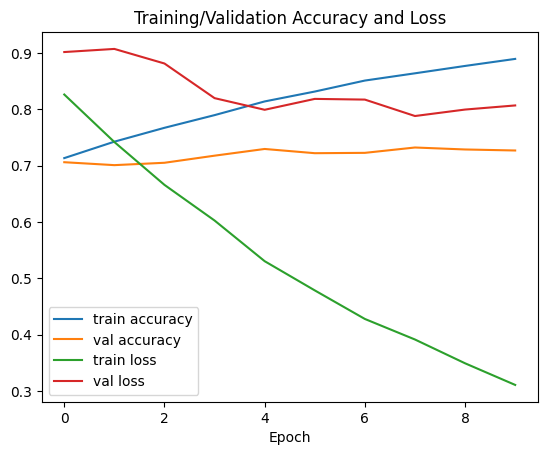

In [5]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Training/Validation Accuracy and Loss")
plt.xlabel("Epoch")
plt.show()


# 5. 模型評估與混淆矩陣

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7247 - loss: 0.8157
Test Accuracy: 0.7172
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


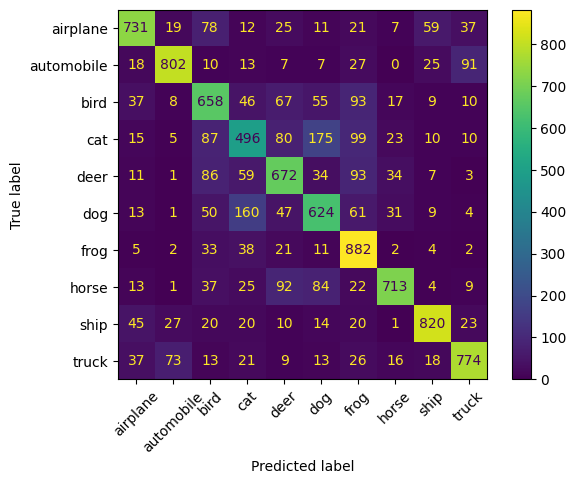

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.show()


# 預測示範

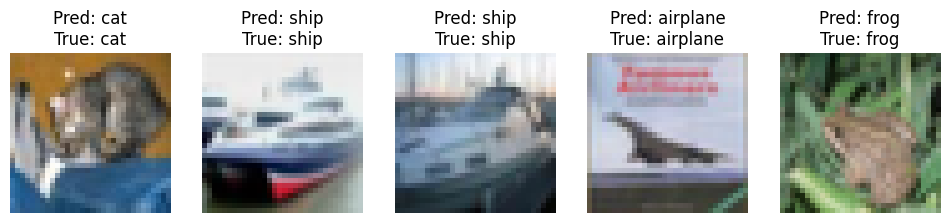

In [7]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_true[i]]}")
    plt.axis('off')
plt.show()


In [ ]:
model.save('hw4-2.keras')


#  7. interact_manual

In [8]:
from ipywidgets import interact_manual

def predict_image(index):
    img = x_test[index]
    plt.imshow(img)
    plt.axis('off')
    pred = model.predict(img.reshape(1, 32, 32, 3))
    pred_label = class_names[np.argmax(pred)]
    true_label = class_names[y_test[index][0]]
    print(f"預測: {pred_label}, 真實: {true_label}")

interact_manual(predict_image, index=(0, len(x_test)-1))


interactive(children=(IntSlider(value=4999, description='index', max=9999), Button(description='Run Interact',…

<function __main__.predict_image(index)>